In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random
%matplotlib inline

In [2]:
!git clone http://github.com/rodolfojbrandao/PHD
%cd PHD

fatal: destination path 'PHD' already exists and is not an empty directory.
/content/PHD


In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
def rede(i,j):
    clf = MLPRegressor(solver='lbfgs',activation='logistic',alpha=1e-5, hidden_layer_sizes=(i),random_state=j)
    return clf

In [0]:
Melhor=1e99
N=20 #i numero de neuronios
M=10 #j
O=10 #k

In [7]:
for k in range(0,O):
  # leitura dos dados
  DAT=pd.read_csv("wc.csv")

  # separa as colunas de interesse
  Index=[0,1,2,3,4,5,6]
  Dat_Select=[]
  Dat_Select=DAT.iloc[:,Index].copy()

  # separa os dados em normatizados e originais
  DAT_OLD=[]
  DAT_OLD=Dat_Select.copy()
  DAT=Normatiza(Dat_Select)
  
  # separa os dados em treino e teste
  train=[]
  test=[]
  train=DAT.sample(frac=0.8,random_state=k).copy()
  test=DAT.drop(train.index).copy()
  
  # obtem as variaveis independentes (treino e teste)
  x_train=train.iloc[:,[0,1,2,3]]
  x_test=test.iloc[:,[0,1,2,3]]
  X_OLD=DAT_OLD.iloc[:,[0,1,2,3]]

  # obtem as variaveis dependentes (treino e teste)
  Index=[6]
  y_train=train.iloc[:,Index]
  y_test=test.iloc[:,Index]
  Y_OLD=DAT_OLD.iloc[:,Index]
  test=Original(y_test,Y_OLD)
  resist_obs_test=[]
  resist_obs_train=[]
  resist_obs_test=test['vp'].copy()
  for i in range(1,N):
      for j in range(0,M):
          col_names=list(y_train)
          clf=rede(i,j)
          clf.fit(x_train, y_train)
          y_calc_train=[]
          y_calc_test=[]
          y_calc_train=clf.predict(x_train)
          y_calc_test=clf.predict(x_test)
          y_calc_train=pd.DataFrame(y_calc_train)
          y_calc_test=pd.DataFrame(y_calc_test)
          y_calc_train.columns = col_names
          y_calc_test.columns = col_names
          y_calc_train=Original(y_calc_train,Y_OLD)
          y_calc_test=Original(y_calc_test,Y_OLD)
          resist_calc_train=[]
          resist_calc_test=[]
          resist_calc_train=y_calc_train['vp'].copy()
          resist_calc_test=y_calc_test['vp'].copy()
          mse=mean_squared_error(resist_obs_test,resist_calc_test)
          R2_teste=r2_score(resist_obs_test,resist_calc_test)
          #print("Neuronios=",i,"Seed=",j,"MSE teste=",mse,"R^2 teste=",R2_teste)
          if(mse<Melhor):
              Melhor=mse.copy()
              ix=i
              jx=j
              R2r=R2_teste
              seed_sample = k
              resist_obs_train_top=Original(y_train,Y_OLD)
              resist_calc_train_top = resist_calc_train.copy()
              resist_obs_test_top = resist_obs_test.copy()
              resist_calc_test_top = resist_calc_test.copy()

mse=mean_squared_error(resist_obs_train_top,resist_calc_train_top)
R2=r2_score(resist_obs_train_top,resist_calc_train_top)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/skl

In [8]:
print("\n Melhor resposta:")
print("Neuronios=",ix,"Seed=",jx,"Seed_sample",seed_sample,"MSE teste=",Melhor,"R^2 teste=",R2r,"MSE treino=",mse,"R^2 treino=",R2)


 Melhor resposta:
Neuronios= 5 Seed= 9 Seed_sample 7 MSE teste= 0.0006109093079929096 R^2 teste= 0.9225607919445608 MSE treino= 0.0003355422813560145 R^2 treino= 0.9648950315529853


In [0]:
resist_obs_train_top=pd.DataFrame(resist_obs_train_top)
resist_calc_train_top=pd.DataFrame(resist_calc_train_top)
resist_obs_test_top=pd.DataFrame(resist_obs_test_top)
resist_calc_test_top=pd.DataFrame(resist_calc_test_top)

In [10]:
print(resist_obs_train_top.head())
print(resist_calc_train_top.head())
print('====================================')
print(resist_obs_test_top.head())
print(resist_calc_test_top.head())

        vp
20  0.3401
18  0.4901
13  0.5501
21  0.5101
1   0.4701
         vp
0  0.340946
1  0.482675
2  0.537969
3  0.510762
4  0.484295
        vp
3   0.5401
4   0.5101
14  0.4401
19  0.4501
23  0.3701
         vp
0  0.573522
1  0.498951
2  0.448411
3  0.435514
4  0.368172


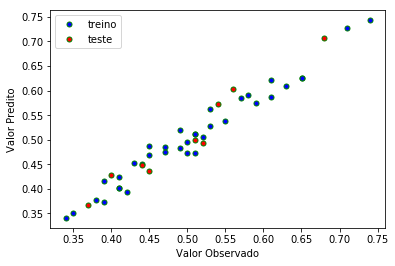

In [11]:
plt.plot(resist_obs_train_top, resist_calc_train_top,  color='green', linestyle='dashed', linewidth = 0, marker='o', markerfacecolor='blue', markersize=5, label='treino') 
plt.ylabel('Superior Calc')
plt.xlabel('Superior Obs')
#plt.xticks(np.arange(17, 30, 2.0))
#plt.yticks(np.arange(17, 30, 2.0))
plt.plot(resist_obs_test_top, resist_calc_test_top,  color='green', linestyle='dashed', linewidth = 0, marker='o', markerfacecolor='red', markersize=5, label='teste') 
plt.legend(loc='upper left')
plt.ylabel('Valor Predito')
plt.xlabel('Valor Observado')
plt.legend()
#plt.xticks(np.arange(17, 30, 2.0))
#plt.yticks(np.arange(17, 30, 2.0))
plt.show()